<a href="https://colab.research.google.com/github/kuaci1/amazon-sales-eda-insights/blob/main/amazon_sales_eda_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = kagglehub.dataset_download("thedevastator/unlock-profits-with-e-commerce-sales-data")
print("Path to dataset files:", path)

# 2. Load dataset utama
file_path = os.path.join(path, "Amazon Sale Report.csv")
df = pd.read_csv(file_path, low_memory=False)

Using Colab cache for faster access to the 'unlock-profits-with-e-commerce-sales-data' dataset.
Path to dataset files: /kaggle/input/unlock-profits-with-e-commerce-sales-data


In [3]:
df.drop(columns=['index', 'Unnamed: 22', 'fulfilled-by', 'ship-country'], inplace=True, errors='ignore')

In [4]:
df.dropna(subset=['Amount', 'Date'], inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipython-input-2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df['Month'] = df['Date'].dt.month_name()

In [8]:
print("Total baris:", len(df))

Total baris: 121180


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121180 non-null  object        
 1   Date                121180 non-null  datetime64[ns]
 2   Status              121180 non-null  object        
 3   Fulfilment          121180 non-null  object        
 4   Sales Channel       121180 non-null  object        
 5   ship-service-level  121180 non-null  object        
 6   Style               121180 non-null  object        
 7   SKU                 121180 non-null  object        
 8   Category            121180 non-null  object        
 9   Size                121180 non-null  object        
 10  ASIN                121180 non-null  object        
 11  Courier Status      116044 non-null  object        
 12  Qty                 121180 non-null  int64         
 13  currency            121180 non-nul

/tmp/ipython-input-4170421191.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")


Text(0.5, 0, 'Bulan')

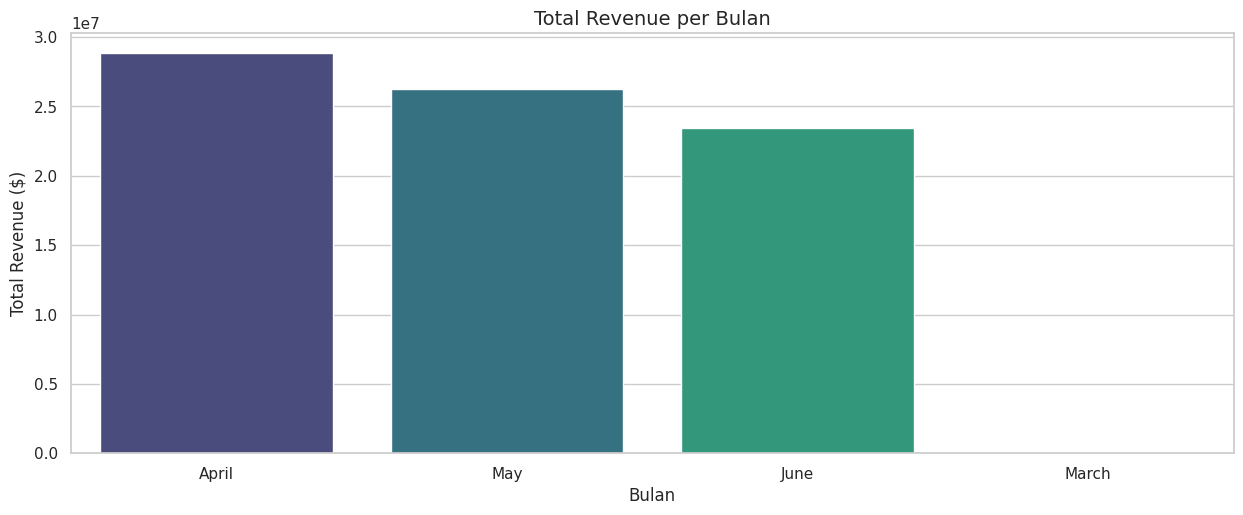

In [21]:
# Set tema visualisasi
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 12))

# --- 1. Tren Penjualan Harian/Bulanan ---
plt.subplot(2, 1, 1)
monthly_sales = df.groupby('Month')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.title('Total Revenue per Bulan', fontsize=14)
plt.ylabel('Total Revenue ($)')
plt.xlabel('Bulan')